<a href="https://colab.research.google.com/github/AlessiaLeoFolliero/BDM/blob/main/Copia_di_Leaves_seconda_prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset:

In [1]:
import pandas as pd
import tensorflow
import keras
import pandas
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import subprocess
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "alessialeofolliero"
os.environ['KAGGLE_KEY'] = "4f468c4b65651a32ed5e320a2d8b06b3"
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification


100% 6.56G/6.56G [02:13<00:00, 95.7MB/s]
100% 6.56G/6.56G [02:13<00:00, 52.9MB/s]


In [3]:
#unzip
!unzip -q /content/plant-leaves-for-image-classification.zip

Cleaning the dataset: Delete all the diseased image

In [4]:
directory_test = "/content/Plants_2/test"
subprocess.call(['find', directory_test, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [5]:
directory_train = "/content/Plants_2/train"
subprocess.call(['find', directory_train, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [6]:
directory_valid = "/content/Plants_2/valid"
subprocess.call(['find', directory_valid, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [7]:
dir='/content/Plants_2/train/Alstonia Scholaris healthy (P2b)/0003_0011.JPG'
with Image.open(dir) as img:
     img.load()

In [8]:
img.size

(6000, 4000)

In [9]:
img.format

'JPEG'

In [10]:
img.mode

'RGB'

Showing the image with matplotlib

In [11]:
import matplotlib.pyplot as plt

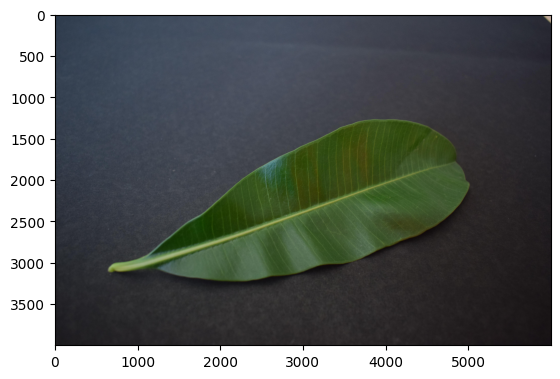

In [12]:
plt.imshow(img)
plt.show()

Resizing the image

In [13]:
from PIL import Image
import os

# Specify the directory where your images are located
root_directory = '/content/Plants_2/test'

# Specify the output directory where resized images will be saved
output_directory = '/content/Plants_2/test_r'

# Function to resize an image
def resize_image(input_path, output_path, size):
    try:
        img = Image.open(input_path)
        img = img.resize(size)
        img.save(output_path)
        print(f'Resized: {output_path}')
    except Exception as e:
        print(f'Error resizing {input_path}: {e}')

# Function to resize images in a directory and its subdirectories
def resize_images_in_directory(directory, output_dir, size=(100, 100)):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                resize_image(input_path, output_path, size)

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0006.JPG
Resized: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0008.JPG
Resized: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0010.JPG
Resized: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0009.JPG
Resized: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0007.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0002.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0003.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0001.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0004.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0005.JPG
Resized: /content/Plants_2/test_r/Lemon healthy (P10a)/0010_0003.JPG
Resized: /content/Plants_2/test_r/Lemon healthy (P10a)/0010_0005.JPG
Resized: /content/Plants_2/test_r/Lemon healthy (P10a)/0010_0001.JPG
Resized: /content/Plants_2/test_r/Lemon healthy (P10a)/0010_0004.JPG
Resized: /content/Plants_2/test_r/

In [14]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/valid'

# Specify the output directory where resized images will be saved
output_directory = '/content/Plants_2/valid_r'

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0001.JPG
Resized: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0003.JPG
Resized: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0002.JPG
Resized: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0005.JPG
Resized: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0004.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0008.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0006.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0007.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0010.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0009.JPG
Resized: /content/Plants_2/valid_r/Lemon healthy (P10a)/0010_0007.JPG
Resized: /content/Plants_2/valid_r/Lemon healthy (P10a)/0010_0006.JPG
Resized: /content/Plants_2/valid_r/Lemon healthy (P10a)/0010_0010.JPG
Resized: /content/Plants_2/valid_r/Lemon healthy (P10a)/0010_0008.JPG
Resized: /content/Pl

In [15]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/train'

# Specify the output directory where resized images will be saved
output_directory = '/content/Plants_2/train_r'

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0057.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0026.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0050.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0066.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0097.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0023.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0047.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0025.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0102.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0096.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0103.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0035.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0036.JPG
Resized: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0012.JPG
Resize

Convert Imagese to greyscale

In [16]:
from PIL import Image
import os

# Specify the directory where your images are located
root_directory = '/content/Plants_2/train_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/train_r'

# Function to convert an image to grayscale
def convert_to_grayscale(input_path, output_path):
    try:
        img = Image.open(input_path)
        img = img.convert("RGB")
        img = img.convert('L')  # Convert to grayscale
        img.save(output_path)
        print(f'Converted to grayscale: {output_path}')
    except Exception as e:
        print(f'Error converting {input_path} to grayscale: {e}')

# Function to convert images to grayscale in a directory and its subdirectories
def convert_images_to_grayscale_in_directory(directory, output_dir):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                convert_to_grayscale(input_path, output_path)

# Call the function with the root directory and desired output directory
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0057.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0026.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0050.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0066.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0097.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0023.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0047.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0025.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0102.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0096.JPG
Converted to grayscale: /content/Plants_2/train_r/Chinar healthy (P11a)/0011_0103.JPG
Converted to grayscale: /content/Plants_2/train_r/Chin

In [17]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/test_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/test_r'

# Call the function with the root directory and desired output directory
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0006.JPG
Converted to grayscale: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0008.JPG
Converted to grayscale: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0010.JPG
Converted to grayscale: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0009.JPG
Converted to grayscale: /content/Plants_2/test_r/Chinar healthy (P11a)/0011_0007.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0002.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0003.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0001.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0004.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0005.JPG
Converted to grayscale: /content/Plants_2/test_r/Lemon healthy (P10a)/0010_0003.JPG
Converted to grayscale: /content/Plants_2/test_r/Lemon healthy (P10a)/0010_0

In [18]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/valid_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/valid_r'

# Call the function with the root directory and desired output directory
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0001.JPG
Converted to grayscale: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0003.JPG
Converted to grayscale: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0002.JPG
Converted to grayscale: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0005.JPG
Converted to grayscale: /content/Plants_2/valid_r/Chinar healthy (P11a)/0011_0004.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0008.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0006.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0007.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0010.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0009.JPG
Converted to grayscale: /content/Plants_2/valid_r/Lemon healthy (P10a)/0010_0007.JPG
Converted to grayscale: /content/Plants_2/valid_r/Lemon healthy (

Data normalization and augmentation

In [19]:
# Data normalization and augmentation
tv_datagenerat = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to the range [0, 1]
    zoom_range=0.2,
    horizontal_flip=False,
)
test_datagen=ImageDataGenerator(rescale=1.0/255)

Train and validation augmentation and normalization

In [20]:
# Load and preprocess the training data
train_generator = tv_datagenerat.flow_from_directory(
    directory=r'/content/Plants_2/train_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    seed=234,
    #class_mode='categorical'  # 'categorical' for multi-class classification
)

valid_generator=tv_datagenerat.flow_from_directory(
    directory=r'/content/Plants_2/valid_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    seed=234,
    #class_mode='categorical'
)


Found 2163 images belonging to 11 classes.
Found 55 images belonging to 11 classes.


Test normalization

In [21]:
test_generat=test_datagen.flow_from_directory(
    directory=r'/content/Plants_2/test_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    seed=234,
    class_mode='sparse'  # 'categorical' for multi-class classification
)

Found 55 images belonging to 11 classes.


Reprint the image to see how did it change

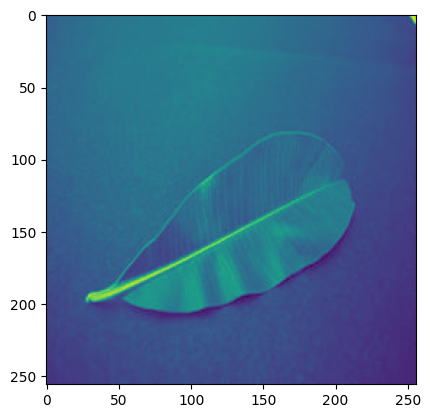

In [22]:
dir='//content/Plants_2/train_r/Alstonia Scholaris healthy (P2b)/0003_0011.JPG'
with Image.open(dir) as img:
     img.load()
plt.imshow(img)
plt.show()

In [23]:
img.size

(256, 256)

In [24]:
img.format

'JPEG'

In [25]:
img.mode

'L'

In [26]:
# Check if the image is in grayscale
is_grayscale = img.mode == "L"

if is_grayscale:
    print("The image is in grayscale.")
else:
    print("The image is not in grayscale.")

The image is in grayscale.


Construction on CCN

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
!pip install keras-tuner
import keras_tuner
from keras_tuner.tuners import Hyperband
from keras_tuner import Hyperband
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import keras
from keras.layers import LeakyReLU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.9 MB/s eta 0:00:00


In [45]:
#defining model
def My_Cnn(param):
  model=Sequential()

  #adding convolution layer
  model.add(Conv2D(filters=param.Int('conv1_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  #adding pooling layer
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding='same'))
  #Dropoutlayer
  model.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.3, step=0.05)))


  ###Second Layer
  model.add(Conv2D(filters=param.Int('conv2_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(param.Float('drop_2', min_value=0.0, max_value=0.3, step=0.05)))

  ###Third Layer
  model.add(Conv2D(filters=param.Int('conv3_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(LeakyReLU(alpha=param.Float('Leaky_3', min_value=0.0, max_value=0.3, step=0.05)))
  model.add(Dropout(param.Float('drop_3', min_value=0.0, max_value=0.3, step=0.05)))

  #adding fully connected layer
  model.add(Flatten())
  model.add(Dense(units=param.Int('units', min_value=32, max_value=128, step=16),activation='relu'))
  model.add(Dropout(param.Float('drop_c', min_value=0.0, max_value=0.3, step=0.05)))

  #adding output layer
  model.add(Dense(11,activation='softmax'))

  #compiling the model
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [46]:
!pip install -q -U keras-tuner

Hyperparameter tuning with keras tuner

In [49]:
tuner_r = keras_tuner.RandomSearch(My_Cnn,
  objective='val_accuracy',
  max_trials=2,
  executions_per_trial=2,
  directory='keras_tuner',
  project_name='leaves',
  overwrite=True)

In [50]:
tuner_h = keras_tuner.Hyperband(My_Cnn,
objective='val_accuracy',
max_epochs=10,
executions_per_trial=3,
directory='keras_tuner',
project_name='leaves',
overwrite=True)

Performing

In [51]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator, validation_data = valid_generator, epochs=8)

Trial 2 Complete [00h 03m 46s]
val_accuracy: 0.8090909123420715

Best val_accuracy So Far: 0.8363636434078217
Total elapsed time: 00h 11m 23s


In [52]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv1_filter': 128,
 'drop_1': 0.15000000000000002,
 'conv2_filter': 112,
 'drop_2': 0.25,
 'conv3_filter': 112,
 'Leaky_3': 0.05,
 'drop_3': 0.15000000000000002,
 'units': 128,
 'drop_c': 0.0}

Model with best parameters

In [53]:
model=tuner_r.get_best_models(num_models=1)[0]

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 112)     129136    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 112)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 112)       0

In [ ]:
mm=model.fit(train_generator, validation_data = valid_generator, epochs=8)

Epoch 1/8
68/68 [==============================] - 28s 375ms/step - loss: 0.2502 - accuracy: 0.9237 - val_loss: 0.4715 - val_accuracy: 0.8364
Epoch 2/8
68/68 [==============================] - 25s 369ms/step - loss: 0.2161 - accuracy: 0.9288 - val_loss: 0.3983 - val_accuracy: 0.8545
Epoch 3/8
51/68 [=====================>........] - ETA: 6s - loss: 0.1846 - accuracy: 0.9339

In [39]:
model.evaluate(test_generat)

2/2 [==============================] - 0s 28ms/step - loss: 0.4349 - accuracy: 0.8364


[0.4348958432674408, 0.8363636136054993]

Loss and validation graphs

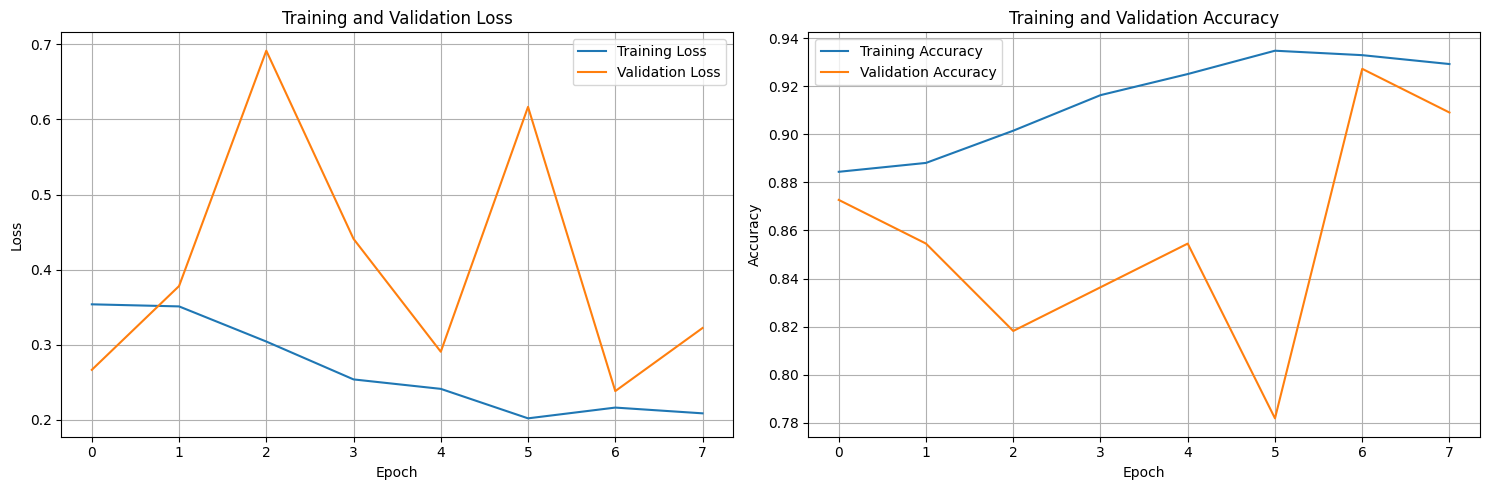

In [40]:
import matplotlib.pyplot as plt

# Extract loss and validation accuracy from the training history
loss = mm.history['loss']
val_loss = mm.history['val_loss']
accuracy = mm.history['accuracy']
val_accuracy = mm.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()


Then after 18 epochs

In [44]:
#perform the hyperparameter tuning, training with 18
tuner_r.search(train_generator, validation_data = valid_generator, epochs=20)

In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv1_filter': 48,
 'drop_1': 0.0,
 'conv2_filter': 80,
 'drop_2': 0.1,
 'conv3_filter': 112,
 'Leaky_3': 0.2,
 'drop_3': 0.2,
 'units': 128,
 'drop_c': 0.05}

In [ ]:
model=tuner_r.get_best_models(num_models=1)[0]

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
mm=model.fit(train_generator, validation_data = valid_generator, epochs=18,callbacks=[early_stop],verbose=1)

Epoch 1/18
68/68 [==============================] - 24s 262ms/step - loss: 0.0909 - accuracy: 0.9732 - val_loss: 0.2824 - val_accuracy: 0.8909
Epoch 2/18
68/68 [==============================] - 15s 221ms/step - loss: 0.1075 - accuracy: 0.9639 - val_loss: 0.5329 - val_accuracy: 0.9091
Epoch 3/18
68/68 [==============================] - 15s 227ms/step - loss: 0.0895 - accuracy: 0.9699 - val_loss: 0.4119 - val_accuracy: 0.8909
Epoch 4/18
68/68 [==============================] - 15s 217ms/step - loss: 0.1004 - accuracy: 0.9653 - val_loss: 0.5628 - val_accuracy: 0.8727
Epoch 5/18
68/68 [==============================] - 15s 212ms/step - loss: 0.0992 - accuracy: 0.9709 - val_loss: 0.7139 - val_accuracy: 0.8364
Epoch 6/18
68/68 [==============================] - 16s 233ms/step - loss: 0.0696 - accuracy: 0.9727 - val_loss: 0.5629 - val_accuracy: 0.8909
Epoch 7/18
68/68 [==============================] - 15s 226ms/step - loss: 0.0764 - accuracy: 0.9755 - val_loss: 0.5591 - val_accuracy: 0.8909

Save the model

In [ ]:
#save the model with the name "model_18ep"
model.save("model_18ep")

#create a zip archive of the saved model
!zip -r -q /content/model_18ep.zip . -i /content/model18ep


To unzip the model

In [ ]:
# load a saved model
!unzip -q /content/model_18ep.zip -d /
model_leaves = tf.keras.models.load_model("./model_18ep")

On the test

In [ ]:
mm1=model.evaluate(test_generat)


AttributeError: ignored

In [ ]:
print('Test loss:', mm1[0])
print('Test accuracy:', mm1[1])


Test loss: 0.40734633803367615
Test accuracy: 0.8727272748947144
